<a href="https://colab.research.google.com/github/harshaaaa7/Harsha_kinghsukh-Website/blob/main/Copy_of_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

In [ ]:
rows = 1000

data = {
    "transaction_id": np.arange(1, rows+1),
    "amount": np.round(np.random.uniform(1, 5000, rows), 2),
    "transaction_type": np.random.choice(["online", "pos", "transfer", "atm"], rows),
    "account_age_days": np.random.randint(1, 3000, rows),
    "location": np.random.choice(["US", "UK", "IN", "CA", "AU", "DE"], rows),
    "is_foreign": np.random.choice([0, 1], rows, p=[0.85, 0.15]),
    "is_high_risk_country": np.random.choice([0, 1], rows, p=[0.9, 0.1]),
    "previous_fraud_activity": np.random.choice([0, 1], rows, p=[0.95, 0.05]),
}

df = pd.DataFrame(data)

# Fraud scoring
fraud_prob = (
    (df["amount"] > 3000).astype(int) * 0.3 +
    df["is_foreign"] * 0.25 +
    df["is_high_risk_country"] * 0.3 +
    df["previous_fraud_activity"] * 0.6 +
    np.random.uniform(0, 0.2, rows)
)

df["is_fraud"] = (fraud_prob > 0.5).astype(int)

df.head()


,transaction_id,amount,transaction_type,account_age_days,location,is_foreign,is_high_risk_country,previous_fraud_activity,is_fraud
0,1,1873.33,transfer,2864,DE,0,0,0,0
1,2,4753.62,atm,1474,US,0,0,0,0
2,3,3660.24,pos,2502,CA,0,1,0,1
3,4,2993.69,atm,1948,CA,0,0,0,0
4,5,780.94,atm,2677,US,0,0,0,0


In [ ]:
df.to_csv("fraud_dataset.csv", index=False)
print("Dataset saved!")


Dataset saved!


In [ ]:
df.describe()
#Exploratory Data Analysis

,transaction_id,amount,account_age_days,is_foreign,is_high_risk_country,previous_fraud_activity,is_fraud
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2451.792450,1530.833000,0.152000,0.092000,0.040000,0.133000
std,288.819436,1460.394621,863.776407,0.359201,0.289171,0.196057,0.339745
min,1.000000,24.160000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,1180.632500,778.250000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,2484.540000,1571.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,3721.855000,2303.500000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,4998.590000,2994.000000,1.000000,1.000000,1.000000,1.000000


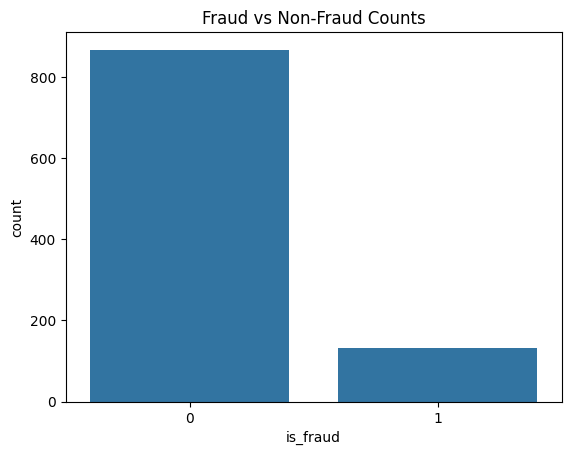

In [ ]:
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non-Fraud Counts")
plt.show()
#Fraud Count


In [ ]:
X = df.drop(["is_fraud", "transaction_id"], axis=1)
y = df["is_fraud"]

numeric_features = ["amount", "account_age_days"]
categorical_features = ["transaction_type", "location"]
binary_features = ["is_foreign", "is_high_risk_country", "previous_fraud_activity"]

# Preprocessing pipeline
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
        ("bin", "passthrough", binary_features)
    ]
)
#Preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)
#Train–Test Split

In [ ]:
log_reg_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", LogisticRegression(max_iter=500))
])

log_reg_model.fit(X_train, y_train)
y_pred_lr = log_reg_model.predict(X_test)

print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
#Train Logistic Regression Model

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       217
           1       1.00      0.76      0.86        33

    accuracy                           0.97       250
   macro avg       0.98      0.88      0.92       250
weighted avg       0.97      0.97      0.97       250



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
print("Random Forest model trained!")
#Train Random Forest Model

Random Forest model trained!


Predictions created!


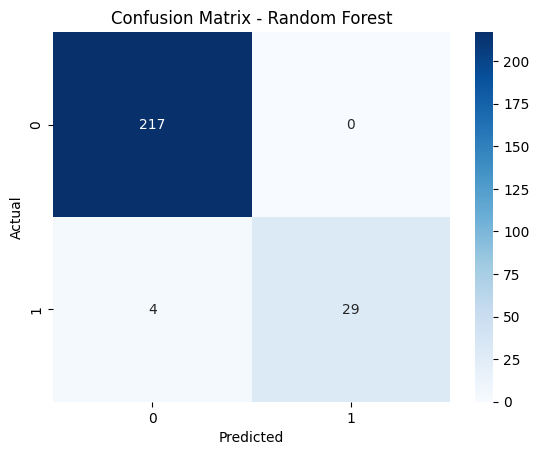

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print("Predictions created!")
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
#Confusion Matrix


In [ ]:
sample = pd.DataFrame([{
    "amount": 4500,
    "transaction_type": "online",
    "account_age_days": 120,
    "location": "DE",
    "is_foreign": 1,
    "is_high_risk_country": 1,
    "previous_fraud_activity": 0
}])

prediction = rf_model.predict(sample)[0]
print("Fraud" if prediction == 1 else "Not Fraud")
#Predict on New Sample

Fraud
